# Lesson 06 - Regression Review

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf


In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Check for Linear Regression. It works best when: 

1. The data is normally distributed (but doesn’t have to be)
2. X’s are independent of each other (low multicollinearity)
3. X’s significantly explain y (have low p-values)





## Check 1. Distribution

#### Last time we plotted our data like this

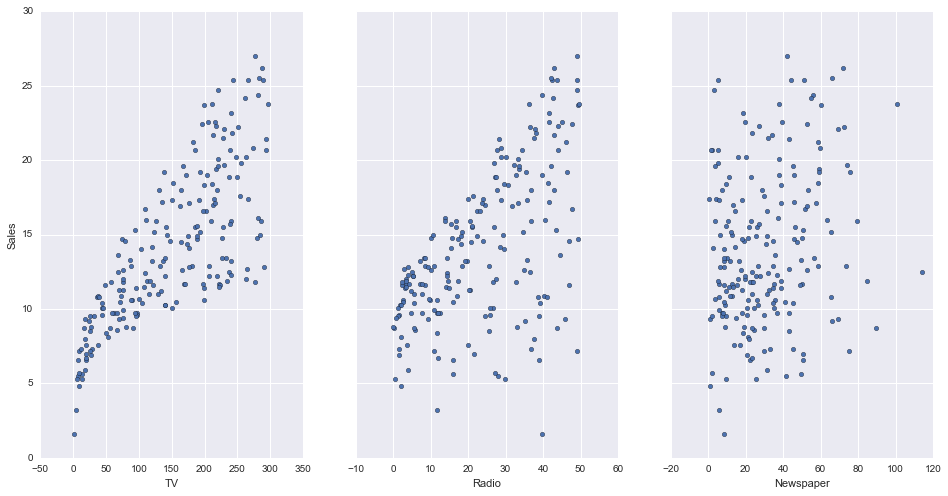

In [3]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

### Seaborn plotting library 
https://stanford.edu/~mwaskom/software/seaborn/index.html

Today we use lmplot https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html


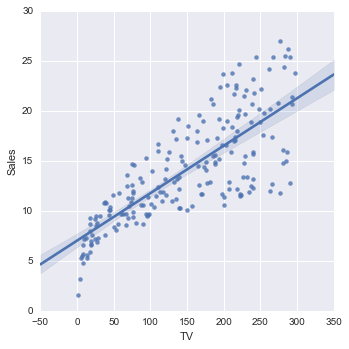

In [4]:
sns.lmplot('TV', 'Sales', data)


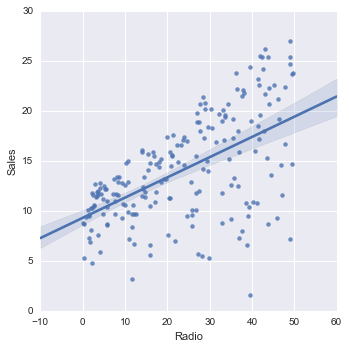

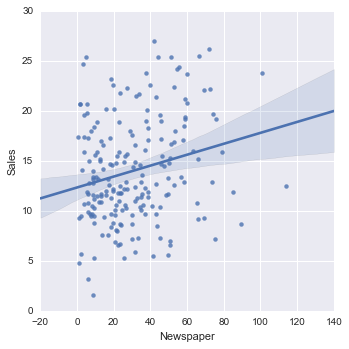

In [5]:
sns.lmplot('Radio', 'Sales', data)
sns.lmplot('Newspaper', 'Sales', data)

## Check 2. Low Multicollinearity

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000
Axes(0.125,0.125;0.62x0.775)


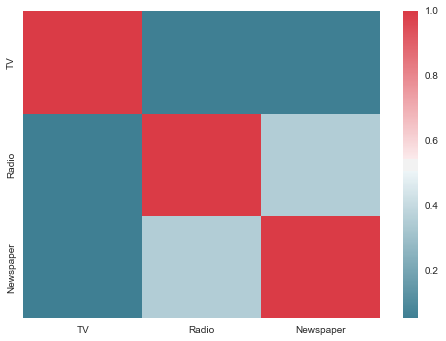

In [6]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data[['TV', 'Radio', 'Newspaper']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

### Student question: 
1. Do these variables have colinearity? 

Answer: 

## Check 3: X’s significantly explain y (have low p-values)

#### Let's take a look again the the crude model

In [7]:
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 16 Jun 2016   Prob (F-statistic):           1.47e-42
Time:                        05:18:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Student Model
#### Now do a full model with TV, Radio and Newspaper
syntax can be found here: http://statsmodels.sourceforge.net/devel/example_formulas.html

In [8]:
#fit model


#print summary


#### 1. Which of the media buys were significantly associated with the sales? 

Answer: 

#### 2. Controlling for all the other media buys, which media type had the largest association with sales?

Answer: 

#### 3. Given that one of the variables above was not significant do we drop it from our model? Why or why not? 

Answer: 